<a href="https://colab.research.google.com/github/ohallao/MoneyBall-Brasileirao/blob/main/MoneyBall_Braisleirao_Goleiros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install soccerdata

In [2]:
import soccerdata as sd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import time
import requests

[01/05/25 15:35:07] INFO     No custom team name replacements found. You can configure these in       ]8;id=111606;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=397476;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_config.py#90\90]8;;\
                             /root/soccerdata/config/teamname_replacements.json.                                   

                    INFO     Custom league dict loaded from                                          ]8;id=331231;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=619155;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_config.py#194\194]8;;\
                             /root/soccerdata/config/league_dict.json.                                             

In [3]:
sd.FBref.available_leagues()

['BRA-Serie A',
 'Big 5 European Leagues Combined',
 'ENG-Premier League',
 'ESP-La Liga',
 'FRA-Ligue 1',
 'GER-Bundesliga',
 'INT-European Championship',
 "INT-Women's World Cup",
 'INT-World Cup',
 'ITA-Serie A']

In [4]:
fbref = sd.FBref(leagues="BRA-Serie A", seasons=2024)
print(fbref.__doc__)

[01/05/25 15:35:09] INFO     Saving cached data to /root/soccerdata/data/FBref                       ]8;id=480967;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=95890;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_common.py#263\263]8;;\

Provides pd.DataFrames from data at http://fbref.com.

    Data will be downloaded as necessary and cached locally in
    ``~/soccerdata/data/FBref``.

    Parameters
    ----------
    leagues : string or iterable, optional
        IDs of leagues to include. For efficiently reading data from the Top-5
        European leagues, use "Big 5 European Leagues Combined".
    seasons : string, int or list, optional
        Seasons to include. Supports multiple formats.
        Examples: '16-17'; 2016; '2016-17'; [14, 15, 16]
    proxy : 'tor' or dict or list(dict) or callable, optional
        Use a proxy to hide your IP address. Valid options are:
            - "tor": Uses the Tor network. Tor should be running in
              the background on port 9050.
            - dict: A dictionary with the proxy to use. The dict should be
              a mapping of supported protocols to proxy addresses. For example::

                  {
                      'http': 'http://10.10.1.10:3128',
     

In [5]:
# 1 - Join player_season_misc + player_season_std
 #por nome ou idade

# Filtrar jogadores com pelo menos 600 minutos jogados

# Remover goleiros (GK), Meias (MF) e Atacantes (FW)

#2- Selecionar as colunas   ('Playing Time', 'Min'),
#    ('Progression', 'PrgC'),
#    ('Progression', 'PrgP')
#    ('Aerial Duels', 'Won%'),
#    ('Aerial Duels', 'Won'),
#    ('Aerial Duels', 'Lost')
#     Fls
#   Defensive Action Tkl,TklW (%),Err,Int


In [6]:
player_season_std = fbref.read_player_season_stats(stat_type="standard")
player_season_std.head()

/usr/local/lib/python3.10/dist-packages/soccerdata/fbref.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat(dfs)
/usr/local/lib/python3.10/dist-packages/soccerdata/_common.py:145: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


nation    pos age  born  \
                                                                             
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio    URU  FW,MF  25  1998   
                                  Alex Santana        BRA  MF,FW  28  1995   
                                  Bento               BRA     GK  24  1999   
                                  Bruno Praxedes      BRA  MF,FW  21  2002   
                                  Bruno Zapelli       ARG  MF,FW  21  2002   

                                                   Playing Time               \
                                                             MP Starts   Min   
league      season team           player                                       
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio           20     14  1215   
                                  Alex Santana                4      0   101   
                                  Bento                       7      7   630   
                                  Bruno Praxedes              7      2   237   
                                  Bruno Zapelli              32     16  1412   

                                                         Performance      ...  \
                                                     90s         Gls Ast  ...   
league      season team           player                                  ...   
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  13.5           4   1  ...   
                                  Alex Santana       1.1           0   0  ...   
                                  Bento              7.0           0   0  ...   
                                  Bruno Praxedes     2.6           0   0  ...   
                                  Bruno Zapelli     15.7           0   5  ...   

                                                   Per 90 Minutes              \
                                                              Gls   Ast   G+A   
league      season team           player                                        
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio            0.3  0.07  0.37   
                                  Alex Santana                0.0   0.0   0.0   
                                  Bento                       0.0   0.0   0.0   
                                  Bruno Praxedes              0.0   0.0   0.0   
                                  Bruno Zapelli               0.0  0.32  0.32   

                                                                            \
                                                   G-PK G+A-PK    xG   xAG   
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  0.3   0.37  0.26  0.18   
                                  Alex Santana      0.0    0.0  0.06   0.0   
                                  Bento             0.0    0.0   0.0   0.0   
                                  Bruno Praxedes    0.0    0.0  0.03  0.12   
                                  Bruno Zapelli     0.0   0.32  0.24   0.3   

                                                                          
                                                   xG+xAG  npxG npxG+xAG  
league      season team           player                                  
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio   0.44  0.26     0.44  
                                  Alex Santana       0.06  0.06     0.06  
                                  Bento               0.0   0.0      0.0  
                                  Bruno Praxedes     0.15  0.03     0.15  
                                  Bruno Zapelli      0.54  0.24     0.54  

[5 rows x 33 columns]

In [7]:
player_season_std = player_season_std.reset_index()
print(player_season_std.columns)
player_season_std.head()

MultiIndex([(        'league',         ''),
            (        'season',         ''),
            (          'team',         ''),
            (        'player',         ''),
            (        'nation',         ''),
            (           'pos',         ''),
            (           'age',         ''),
            (          'born',         ''),
            (  'Playing Time',       'MP'),
            (  'Playing Time',   'Starts'),
            (  'Playing Time',      'Min'),
            (  'Playing Time',      '90s'),
            (   'Performance',      'Gls'),
            (   'Performance',      'Ast'),
            (   'Performance',      'G+A'),
            (   'Performance',     'G-PK'),
            (   'Performance',       'PK'),
            (   'Performance',    'PKatt'),
            (   'Performance',     'CrdY'),
            (   'Performance',     'CrdR'),
            (      'Expected',       'xG'),
            (      'Expected',     'npxG'),
            (      'Expected',  

league season            team            player nation    pos age  \
                                                                            
0  BRA-Serie A   2425  Ath Paranaense  Agustín Canobbio    URU  FW,MF  25   
1  BRA-Serie A   2425  Ath Paranaense      Alex Santana    BRA  MF,FW  28   
2  BRA-Serie A   2425  Ath Paranaense             Bento    BRA     GK  24   
3  BRA-Serie A   2425  Ath Paranaense    Bruno Praxedes    BRA  MF,FW  21   
4  BRA-Serie A   2425  Ath Paranaense     Bruno Zapelli    ARG  MF,FW  21   

   born Playing Time         ... Per 90 Minutes                                \
                  MP Starts  ...            Gls   Ast   G+A G-PK G+A-PK    xG   
0  1998           20     14  ...            0.3  0.07  0.37  0.3   0.37  0.26   
1  1995            4      0  ...            0.0   0.0   0.0  0.0    0.0  0.06   
2  1999            7      7  ...            0.0   0.0   0.0  0.0    0.0   0.0   
3  2002            7      2  ...            0.0   0.0   0.0  0.0    0.0  0.03   
4  2002           32     16  ...            0.0  0.32  0.32  0.0   0.32  0.24   

                               
    xAG xG+xAG  npxG npxG+xAG  
0  0.18   0.44  0.26     0.44  
1   0.0   0.06  0.06     0.06  
2   0.0    0.0   0.0      0.0  
3  0.12   0.15  0.03     0.15  
4   0.3   0.54  0.24     0.54  

[5 rows x 37 columns]

In [8]:
player_season_gk = fbref.read_player_season_stats(stat_type="keeper")
player_season_gk.head()

/usr/local/lib/python3.10/dist-packages/soccerdata/fbref.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat(dfs)
/usr/local/lib/python3.10/dist-packages/soccerdata/_common.py:145: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


nation pos age  born  \
                                                                        
league      season team           player                                
BRA-Serie A 2425   Ath Paranaense Bento             BRA  GK  24  1999   
                                  Leonardo Linck    BRA  GK  22  2001   
                                  Mycael            BRA  GK  19  2004   
                   Atl Goianiense Pedro Rangel      BRA  GK  23  2000   
                                  Ronaldo           BRA  GK  27  1996   

                                                 Playing Time               \
                                                           MP Starts   Min   
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Bento                     7      7   630   
                                  Leonardo Linck           14     14  1223   
                                  Mycael                   19     17  1565   
                   Atl Goianiense Pedro Rangel              6      6   540   
                                  Ronaldo                  32     32  2879   

                                                       Performance        ...  \
                                                   90s          GA  GA90  ...   
league      season team           player                                  ...   
BRA-Serie A 2425   Ath Paranaense Bento            7.0           4  0.57  ...   
                                  Leonardo Linck  13.6          21  1.55  ...   
                                  Mycael          17.4          21  1.21  ...   
                   Atl Goianiense Pedro Rangel     6.0          12   2.0  ...   
                                  Ronaldo         32.0          45  1.41  ...   

                                                                     \
                                                  W  D   L CS   CS%   
league      season team           player                              
BRA-Serie A 2425   Ath Paranaense Bento           4  1   2  4  57.1   
                                  Leonardo Linck  3  4   7  1   7.1   
                                  Mycael          4  4   9  4  23.5   
                   Atl Goianiense Pedro Rangel    0  1   5  1  16.7   
                                  Ronaldo         7  8  17  6  18.8   

                                                 Penalty Kicks               \
                                                         PKatt PKA PKsv PKm   
league      season team           player                                      
BRA-Serie A 2425   Ath Paranaense Bento                      1   0    1   0   
                                  Leonardo Linck             0   0    0   0   
                                  Mycael                     2   0    2   0   
                   Atl Goianiense Pedro Rangel               2   2    0   0   
                                  Ronaldo                    7   4    3   0   

                                                         
                                                  Save%  
league      season team           player                 
BRA-Serie A 2425   Ath Paranaense Bento           100.0  
                                  Leonardo Linck   <NA>  
                                  Mycael          100.0  
                   Atl Goianiense Pedro Rangel      0.0  
                                  Ronaldo          42.9  

[5 rows x 23 columns]

In [9]:
player_season_gk = player_season_gk.reset_index()
print(player_season_gk.columns)
player_season_gk.head()

MultiIndex([(       'league',       ''),
            (       'season',       ''),
            (         'team',       ''),
            (       'player',       ''),
            (       'nation',       ''),
            (          'pos',       ''),
            (          'age',       ''),
            (         'born',       ''),
            ( 'Playing Time',     'MP'),
            ( 'Playing Time', 'Starts'),
            ( 'Playing Time',    'Min'),
            ( 'Playing Time',    '90s'),
            (  'Performance',     'GA'),
            (  'Performance',   'GA90'),
            (  'Performance',   'SoTA'),
            (  'Performance',  'Saves'),
            (  'Performance',  'Save%'),
            (  'Performance',      'W'),
            (  'Performance',      'D'),
            (  'Performance',      'L'),
            (  'Performance',     'CS'),
            (  'Performance',    'CS%'),
            ('Penalty Kicks',  'PKatt'),
            ('Penalty Kicks',    'PKA'),
            ('Pe

league season            team          player nation pos age  born  \
                                                                             
0  BRA-Serie A   2425  Ath Paranaense           Bento    BRA  GK  24  1999   
1  BRA-Serie A   2425  Ath Paranaense  Leonardo Linck    BRA  GK  22  2001   
2  BRA-Serie A   2425  Ath Paranaense          Mycael    BRA  GK  19  2004   
3  BRA-Serie A   2425  Atl Goianiense    Pedro Rangel    BRA  GK  23  2000   
4  BRA-Serie A   2425  Atl Goianiense         Ronaldo    BRA  GK  27  1996   

  Playing Time         ... Performance                 Penalty Kicks           \
            MP Starts  ...           W  D   L CS   CS%         PKatt PKA PKsv   
0            7      7  ...           4  1   2  4  57.1             1   0    1   
1           14     14  ...           3  4   7  1   7.1             0   0    0   
2           19     17  ...           4  4   9  4  23.5             2   0    2   
3            6      6  ...           0  1   5  1  16.7             2   2    0   
4           32     32  ...           7  8  17  6  18.8             7   4    3   

              
  PKm  Save%  
0   0  100.0  
1   0   <NA>  
2   0  100.0  
3   0    0.0  
4   0   42.9  

[5 rows x 27 columns]

In [10]:
player_season_gkad = fbref.read_player_season_stats(stat_type="keeper_adv")
player_season_gkad.head()

/usr/local/lib/python3.10/dist-packages/soccerdata/fbref.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat(dfs)
/usr/local/lib/python3.10/dist-packages/soccerdata/_common.py:145: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


nation pos age  born   90s  \
                                                                              
league      season team           player                                      
BRA-Serie A 2425   Ath Paranaense Bento             BRA  GK  24  1999   7.0   
                                  Leonardo Linck    BRA  GK  22  2001  13.6   
                                  Mycael            BRA  GK  19  2004  17.4   
                   Atl Goianiense Pedro Rangel      BRA  GK  23  2000   6.0   
                                  Ronaldo           BRA  GK  27  1996  32.0   

                                                 Goals               ...  \
                                                    GA PKA FK CK OG  ...   
league      season team           player                             ...   
BRA-Serie A 2425   Ath Paranaense Bento              4   0  0  1  0  ...   
                                  Leonardo Linck    21   0  1  3  0  ...   
                                  Mycael            21   0  1  3  0  ...   
                   Atl Goianiense Pedro Rangel      12   2  0  3  0  ...   
                                  Ronaldo           45   4  1  3  2  ...   

                                                 Passes Goal Kicks          \
                                                 AvgLen        Att Launch%   
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Bento            34.8         47    78.7   
                                  Leonardo Linck   36.3         78    43.6   
                                  Mycael           38.6        131    63.4   
                   Atl Goianiense Pedro Rangel     35.8         43    44.2   
                                  Ronaldo          36.2        245    62.9   

                                                        Crosses           \
                                                 AvgLen     Opp Stp Stp%   
league      season team           player                                   
BRA-Serie A 2425   Ath Paranaense Bento            55.7      86   6  7.0   
                                  Leonardo Linck   41.6     200  10  5.0   
                                  Mycael           48.5     250   4  1.6   
                   Atl Goianiense Pedro Rangel     40.3      84   6  7.1   
                                  Ronaldo          46.6     436  37  8.5   

                                                 Sweeper                  
                                                    #OPA #OPA/90 AvgDist  
league      season team           player                                  
BRA-Serie A 2425   Ath Paranaense Bento                2    0.29    11.3  
                                  Leonardo Linck      10    0.74    11.3  
                                  Mycael               5    0.29    10.2  
                   Atl Goianiense Pedro Rangel         7    1.17    15.3  
                                  Ronaldo             25    0.78    13.3  

[5 rows x 30 columns]

In [11]:
player_season_gkad = player_season_gkad.reset_index()
print(player_season_gkad.columns)
player_season_gkad.head()

MultiIndex([(    'league',         ''),
            (    'season',         ''),
            (      'team',         ''),
            (    'player',         ''),
            (    'nation',         ''),
            (       'pos',         ''),
            (       'age',         ''),
            (      'born',         ''),
            (       '90s',         ''),
            (     'Goals',       'GA'),
            (     'Goals',      'PKA'),
            (     'Goals',       'FK'),
            (     'Goals',       'CK'),
            (     'Goals',       'OG'),
            (  'Expected',     'PSxG'),
            (  'Expected', 'PSxG/SoT'),
            (  'Expected',  'PSxG+/-'),
            (  'Expected',      '/90'),
            (  'Launched',      'Cmp'),
            (  'Launched',      'Att'),
            (  'Launched',     'Cmp%'),
            (    'Passes', 'Att (GK)'),
            (    'Passes',      'Thr'),
            (    'Passes',  'Launch%'),
            (    'Passes',   'AvgLen'),


league season            team          player nation pos age  born  \
                                                                             
0  BRA-Serie A   2425  Ath Paranaense           Bento    BRA  GK  24  1999   
1  BRA-Serie A   2425  Ath Paranaense  Leonardo Linck    BRA  GK  22  2001   
2  BRA-Serie A   2425  Ath Paranaense          Mycael    BRA  GK  19  2004   
3  BRA-Serie A   2425  Atl Goianiense    Pedro Rangel    BRA  GK  23  2000   
4  BRA-Serie A   2425  Atl Goianiense         Ronaldo    BRA  GK  27  1996   

    90s Goals  ... Passes Goal Kicks                Crosses          Sweeper  \
           GA  ... AvgLen        Att Launch% AvgLen     Opp Stp Stp%    #OPA   
0   7.0     4  ...   34.8         47    78.7   55.7      86   6  7.0       2   
1  13.6    21  ...   36.3         78    43.6   41.6     200  10  5.0      10   
2  17.4    21  ...   38.6        131    63.4   48.5     250   4  1.6       5   
3   6.0    12  ...   35.8         43    44.2   40.3      84   6  7.1       7   
4  32.0    45  ...   36.2        245    62.9   46.6     436  37  8.5      25   

                   
  #OPA/90 AvgDist  
0    0.29    11.3  
1    0.74    11.3  
2    0.29    10.2  
3    1.17    15.3  
4    0.78    13.3  

[5 rows x 34 columns]

In [12]:
# 1. Achatar o MultiIndex para facilitar a manipulação
player_season_std.columns = ['_'.join(col).strip() for col in player_season_std.columns]
player_season_gk.columns = ['_'.join(col).strip() for col in player_season_gk.columns]
player_season_gkad.columns = ['_'.join(col).strip() for col in player_season_gkad.columns]

# 2. Verificar os novos nomes das colunas
print(player_season_std.columns)
print(player_season_gk.columns)
print(player_season_gkad.columns)

Index(['league_', 'season_', 'team_', 'player_', 'nation_', 'pos_', 'age_',
       'born_', 'Playing Time_MP', 'Playing Time_Starts', 'Playing Time_Min',
       'Playing Time_90s', 'Performance_Gls', 'Performance_Ast',
       'Performance_G+A', 'Performance_G-PK', 'Performance_PK',
       'Performance_PKatt', 'Performance_CrdY', 'Performance_CrdR',
       'Expected_xG', 'Expected_npxG', 'Expected_xAG', 'Expected_npxG+xAG',
       'Progression_PrgC', 'Progression_PrgP', 'Progression_PrgR',
       'Per 90 Minutes_Gls', 'Per 90 Minutes_Ast', 'Per 90 Minutes_G+A',
       'Per 90 Minutes_G-PK', 'Per 90 Minutes_G+A-PK', 'Per 90 Minutes_xG',
       'Per 90 Minutes_xAG', 'Per 90 Minutes_xG+xAG', 'Per 90 Minutes_npxG',
       'Per 90 Minutes_npxG+xAG'],
      dtype='object')
Index(['league_', 'season_', 'team_', 'player_', 'nation_', 'pos_', 'age_',
       'born_', 'Playing Time_MP', 'Playing Time_Starts', 'Playing Time_Min',
       'Playing Time_90s', 'Performance_GA', 'Performance_GA90',
    

In [13]:
df_gk_selected = player_season_gk[
    ['player_', 'team_', 'Performance_GA', 'Performance_SoTA', 'Performance_Saves','Performance_Save%','Performance_CS','Performance_CS%',]
]
df_gkad_selected = player_season_gkad[
    ['player_', 'team_','Expected_PSxG', 'Expected_PSxG+/-','Passes_Att (GK)','Passes_Launch%', 'Passes_AvgLen','Crosses_Opp', 'Crosses_Stp', 'Crosses_Stp%','Sweeper_#OPA',
       'Sweeper_#OPA/90', 'Sweeper_AvgDist']
]

In [14]:

# 3. Selecionar as colunas desejadas de cada DataFrame
df_std_selected = player_season_std[
    ['player_', 'team_','pos_','Playing Time_Min',]
]
df_gk_selected = player_season_gk[
    ['player_', 'team_', 'Performance_GA', 'Performance_SoTA', 'Performance_Saves','Performance_Save%','Performance_CS','Performance_CS%',]
]
df_gkad_selected = player_season_gkad[
    ['player_', 'team_','Expected_PSxG', 'Expected_PSxG+/-','Passes_Att (GK)','Passes_Launch%', 'Passes_AvgLen','Crosses_Opp', 'Crosses_Stp', 'Crosses_Stp%','Sweeper_#OPA',
       'Sweeper_#OPA/90', 'Sweeper_AvgDist']
]

# 4. Realizar o merge dos três DataFrames com base nas colunas 'player_' e 'team_'
df_merged_1 = pd.merge(df_std_selected, df_gk_selected, on=['player_', 'team_'], how='inner')
df_merged = pd.merge(df_merged_1, df_gkad_selected, on=['player_', 'team_'], how='inner')

# 5. Exibir o resultado
print(df_merged.head())

          player_           team_ pos_  Playing Time_Min  Performance_GA  \
0           Bento  Ath Paranaense   GK               630               4   
1  Leonardo Linck  Ath Paranaense   GK              1223              21   
2          Mycael  Ath Paranaense   GK              1565              21   
3    Pedro Rangel  Atl Goianiense   GK               540              12   
4         Ronaldo  Atl Goianiense   GK              2879              45   

   Performance_SoTA  Performance_Saves  Performance_Save%  Performance_CS  \
0                25                 20               84.0               4   
1                65                 44               67.7               1   
2                83                 60               74.7               4   
3                34                 22               70.6               1   
4               141                 95               70.9               6   

   Performance_CS%  ...  Expected_PSxG+/-  Passes_Att (GK)  Passes_Launch%  \
0 

In [15]:
# Filtrar jogadores com pelo menos 600 minutos jogados
filtered_data = df_merged[df_merged[('Playing Time_Min')] >= 600]

# Filtrar para remover goleiros (GK), Meias (MF), Atacantes(FW)
filtered_data = filtered_data[
    ~filtered_data[('pos_')].str.contains('DF|MF|FW', na=False)
]

# Exibir as primeiras linhas para confirmar a filtragem
print(filtered_data.head())


          player_             team_ pos_  Playing Time_Min  Performance_GA  \
0           Bento    Ath Paranaense   GK               630               4   
1  Leonardo Linck    Ath Paranaense   GK              1223              21   
2          Mycael    Ath Paranaense   GK              1565              21   
4         Ronaldo    Atl Goianiense   GK              2879              45   
6  Matheus Mendes  Atlético Mineiro   GK              1087              22   

   Performance_SoTA  Performance_Saves  Performance_Save%  Performance_CS  \
0                25                 20               84.0               4   
1                65                 44               67.7               1   
2                83                 60               74.7               4   
4               141                 95               70.9               6   
6                67                 44               68.7               1   

   Performance_CS%  ...  Expected_PSxG+/-  Passes_Att (GK)  Passes_L

In [16]:
# Selecionar as colunas desejadas para análise
Gol = filtered_data[[
    ('player_'),
    ('team_'),
    ('pos_'),
    ('Playing Time_Min'),
    ('Performance_GA'),
    ('Performance_SoTA'),
    ('Performance_Saves'),
    ('Performance_Save%'),
    ('Performance_CS'),
    ('Performance_CS%'),
    ('Expected_PSxG'),
    ('Expected_PSxG+/-'),
    ('Passes_Att (GK)'),
    ('Passes_Launch%'),
    ('Passes_AvgLen'),
    ('Crosses_Opp'),
    ('Crosses_Stp'),
    ('Crosses_Stp%'),
    ('Sweeper_#OPA'),
    ('Sweeper_#OPA/90'),
    ('Sweeper_AvgDist'),
]]

# Renomear as colunas para facilitar o uso
Gol.columns = ['jogador', 'time', 'posicao', 'Minutos', 'GA', 'SoTA', 'Saves', 'Saves%', 'Clean Sheet','Clean Sheet%','PSxG', 'PSxG+/-', 'Passes Att', 'Passes Launch%', 'Passes AvgLen','Crosses Opp','Crosses Stp','Crosses Stp%','Sweeper #OPA','Sweeper #OPA/90','Sweeper AvgDist']


# Exibir as primeiras linhas para confirmar a seleção de colunas
print(Gol.head())

# Remover jogadores com todas as métricas iguais a 0
#Gol = Gol[(Gol[['Prgc', 'PrgP', 'Aerial Duel%','Aerial Duel Won','Aerial Duel Lost', 'Fouls','Desarmes Totais','Desarmes%','Interceptacao','Desarmes Certos',]] != 0).any(axis=1)]
# Exibir as primeiras linhas para conferir
Gol.head


          jogador              time posicao  Minutos  GA  SoTA  Saves  Saves%  \
0           Bento    Ath Paranaense      GK      630   4    25     20    84.0   
1  Leonardo Linck    Ath Paranaense      GK     1223  21    65     44    67.7   
2          Mycael    Ath Paranaense      GK     1565  21    83     60    74.7   
4         Ronaldo    Atl Goianiense      GK     2879  45   141     95    70.9   
6  Matheus Mendes  Atlético Mineiro      GK     1087  22    67     44    68.7   

   Clean Sheet  Clean Sheet%  ...  PSxG+/-  Passes Att  Passes Launch%  \
0            4          57.1  ...      2.5         123            39.8   
1            1           7.1  ...     -2.5         276            40.2   
2            4          23.5  ...      2.5         273            49.5   
4            6          18.8  ...     -0.4         647            39.4   
6            1           8.3  ...      3.8         252            20.6   

   Passes AvgLen  Crosses Opp  Crosses Stp  Crosses Stp%  Sweeper #O

<bound method NDFrame.head of                jogador                 time posicao  Minutos  GA  SoTA  Saves  \
0                Bento       Ath Paranaense      GK      630   4    25     20   
1       Leonardo Linck       Ath Paranaense      GK     1223  21    65     44   
2               Mycael       Ath Paranaense      GK     1565  21    83     60   
4              Ronaldo       Atl Goianiense      GK     2879  45   141     95   
6       Matheus Mendes     Atlético Mineiro      GK     1087  22    67     44   
7              Éverson     Atlético Mineiro      GK     2242  31    95     64   
10       Marcos Felipe                Bahia      GK     2996  43   150    106   
12                John        Botafogo (RJ)      GK     3060  25   117     91   
15          Hugo Souza          Corinthians      GK     1980  23    96     73   
16     Matheus Donelli          Corinthians      GK      630  12    40     27   
18             Gustavo             Criciúma      GK     2997  54   174    119   
19            Anderson             Cruzeiro      GK     1530  22    72     51   
20              Cássio             Cruzeiro      GK     1890  19   101     82   
22              Walter               Cuiabá      GK     3240  47   174    126   
23       Agustín Rossi             Flamengo      GK     3150  39   120     80   
25               Fábio           Fluminense      GK     3330  37   168    131   
27  João Ricardo Riedi            Fortaleza      GK     3420  39   195    156   
28   Agustín Marchesín               Grêmio      GK     2475  32   133    100   
32            Fabrício        Internacional      GK      720   8    34     26   
33       Sergio Rochet        Internacional      GK     2520  27   100     73   
34             Gabriel            Juventude      GK     3014  49   156    106   
37            Wéverton            Palmeiras      GK     3330  31   149    119   
38  Cleiton Schwengber  Red Bull Bragantino      GK     2699  37   144    106   
40               Lucão  Red Bull Bragantino      GK      631   9    32     23   
41             Jandrei            São Paulo      GK     1170  16    56     41   
42        Rafael Pires            São Paulo      GK     2250  27    92     67   
43          Léo Jardim        Vasco da Gama      GK     3420  56   203    147   
44       Lucas Arcanjo              Vitória      GK     3330  52   162    112   

    Saves%  Clean Sheet  Clean Sheet%  ...  PSxG+/-  Passes Att  \
0     84.0            4          57.1  ...      2.5         123   
1     67.7            1           7.1  ...     -2.5         276   
2     74.7            4          23.5  ...      2.5         273   
4     70.9            6          18.8  ...     -0.4         647   
6     68.7            1           8.3  ...      3.8         252   
7     71.6            8          32.0  ...     -0.2         622   
10    72.7            9          26.5  ...     -1.0        1069   
12    82.9           16          47.1  ...      8.0         884   
15    80.2            7          31.8  ...      5.4         443   
16    72.5            0           0.0  ...     -1.8         145   
18    71.3            6          17.6  ...      3.5         601   
19    70.8            6          35.3  ...      1.9         345   
20    82.2            6          28.6  ...      7.9         430   
22    76.4            9          25.0  ...      5.2         732   
23    69.2            8          22.9  ...      3.6        1009   
25    80.4           13          35.1  ...     14.4         643   
27    82.6           13          34.2  ...     13.5         682   
28    80.5            7          25.0  ...      3.8         602   
32    79.4            3          37.5  ...      0.1         150   
33    76.0            8          28.6  ...     -0.1         590   
34    74.4            6          17.6  ...      4.7         888   
37    79.9           16          43.2  ...     10.4         900   
38    75.0            5          16.1  ...      9.6         759   
40    71.9  

### **2. Criar modelos de classificação para  (Goleiros)**

In [21]:
# Padronizar os dados para clusterização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Gol[['GA', 'SoTA', 'Saves', 'Saves%', 'Clean Sheet','Clean Sheet%','PSxG', 'PSxG+/-', 'Passes Att', 'Passes Launch%', 'Passes AvgLen','Crosses Opp','Crosses Stp','Crosses Stp%','Sweeper #OPA','Sweeper #OPA/90','Sweeper AvgDist']])

# Definir e ajustar o modelo K-Means
kmeans = KMeans(n_clusters=5, init='random', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adicionar os clusters ao DataFrame
Gol['Cluster'] = clusters

# Exibir os jogadores com seus clusters
print(Gol[['GA', 'SoTA', 'Saves', 'Saves%', 'Clean Sheet','Clean Sheet%','PSxG', 'PSxG+/-', 'Passes Att', 'Passes Launch%', 'Passes AvgLen','Crosses Opp','Crosses Stp','Crosses Stp%','Sweeper #OPA','Sweeper #OPA/90','Sweeper AvgDist']])

    GA  SoTA  Saves  Saves%  Clean Sheet  Clean Sheet%  PSxG  PSxG+/-  \
0    4    25     20    84.0            4          57.1   6.5      2.5   
1   21    65     44    67.7            1           7.1  18.5     -2.5   
2   21    83     60    74.7            4          23.5  23.5      2.5   
4   45   141     95    70.9            6          18.8  42.6     -0.4   
6   22    67     44    68.7            1           8.3  25.8      3.8   
7   31    95     64    71.6            8          32.0  29.8     -0.2   
10  43   150    106    72.7            9          26.5  42.0     -1.0   
12  25   117     91    82.9           16          47.1  33.0      8.0   
15  23    96     73    80.2            7          31.8  28.4      5.4   
16  12    40     27    72.5            0           0.0  10.2     -1.8   
18  54   174    119    71.3            6          17.6  56.5      3.5   
19  22    72     51    70.8            6          35.3  22.9      1.9   
20  19   101     82    82.2            6          2

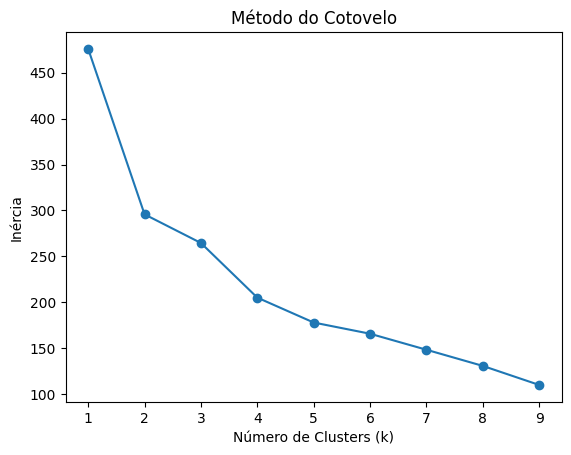

In [22]:
#Avaliar o Número de Clusters
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

In [23]:
# Verificar se há algum NaN em X_scaled
tem_nan = np.isnan(X_scaled).any()

if tem_nan:
    print("X_scaled contém NaNs.")
else:
    print("X_scaled não contém NaNs.")

# Para ver a quantidade de NaNs por coluna:
nans_por_coluna = np.isnan(X_scaled).sum(axis=0)
print("Número de NaNs por coluna:", nans_por_coluna)

# Para ver a quantidade total de NaNs:
total_nans = np.isnan(X_scaled).sum()
print("Número total de NaNs:", total_nans)

X_scaled não contém NaNs.
Número de NaNs por coluna: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Número total de NaNs: 0


In [24]:
# Calcular as médias de cada cluster apenas para colunas numéricas
cluster_summary = Gol.groupby('Cluster').agg({col: 'mean' for col in Gol.select_dtypes(include=['number']).columns})
print(cluster_summary)

             Minutos         GA        SoTA       Saves     Saves%  \
Cluster                                                              
0             2906.5  36.666667  131.166667   93.666667  75.033333   
1             3360.0  35.666667  170.666667  135.333333  80.966667   
2         938.428571       13.0   47.857143   34.428571  74.771429   
3        3056.833333  47.666667       164.5       116.5      73.55   
4        1829.833333       24.0   87.166667        63.5  74.383333   

         Clean Sheet  Clean Sheet%       PSxG    PSxG+/-  Passes Att  \
Cluster                                                                
0           8.666667     26.466667       40.3   4.133333       866.5   
1               14.0          37.5       48.1  12.766667  741.666667   
2           2.428571     24.671429  12.242857  -0.614286  217.714286   
3           7.333333     21.516667  48.566667        1.9  692.833333   
4                6.0          28.0  26.266667   2.933333  433.333333   

    

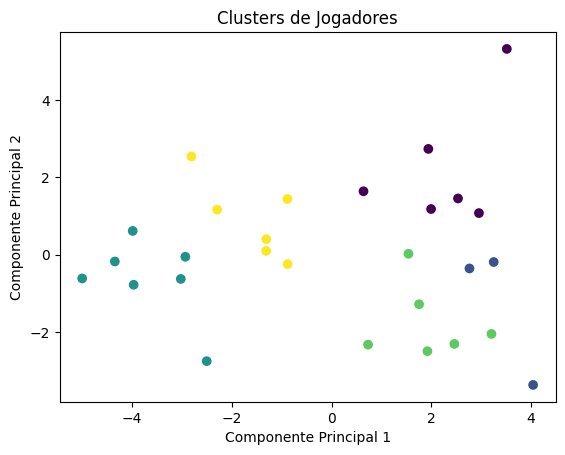

In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters de Jogadores')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


In [26]:
# Selecionar apenas as colunas numéricas para calcular a correlação
numeric_columns = Gol.select_dtypes(include=np.number).columns
correlation_matrix = Gol[numeric_columns].corr()

# Exibir a matriz de correlação
print(correlation_matrix)

                  Minutos        GA      SoTA     Saves    Saves%  \
Minutos          1.000000  0.881496  0.947734  0.937561  0.090462   
GA               0.881496  1.000000  0.925084  0.860940 -0.252530   
SoTA             0.947734  0.925084  1.000000  0.989395  0.071534   
Saves            0.937561  0.860940  0.989395  1.000000  0.187976   
Saves%           0.090462 -0.252530  0.071534  0.187976  1.000000   
Clean Sheet      0.788450  0.441236  0.651273  0.710201  0.480766   
Clean Sheet%     0.112411 -0.221056 -0.028732  0.050325  0.700650   
PSxG             0.923888  0.945855  0.977763  0.949516 -0.018516   
PSxG+/-          0.462086  0.202602  0.496693  0.582353  0.616225   
Passes Att       0.910302  0.785448  0.798355  0.772883 -0.001433   
Passes Launch%   0.139165  0.137110  0.243163  0.269002  0.229898   
Passes AvgLen    0.200351  0.185333  0.288733  0.313341  0.209324   
Crosses Opp      0.941801  0.910938  0.973279  0.959866  0.070544   
Crosses Stp      0.861948  0.76253

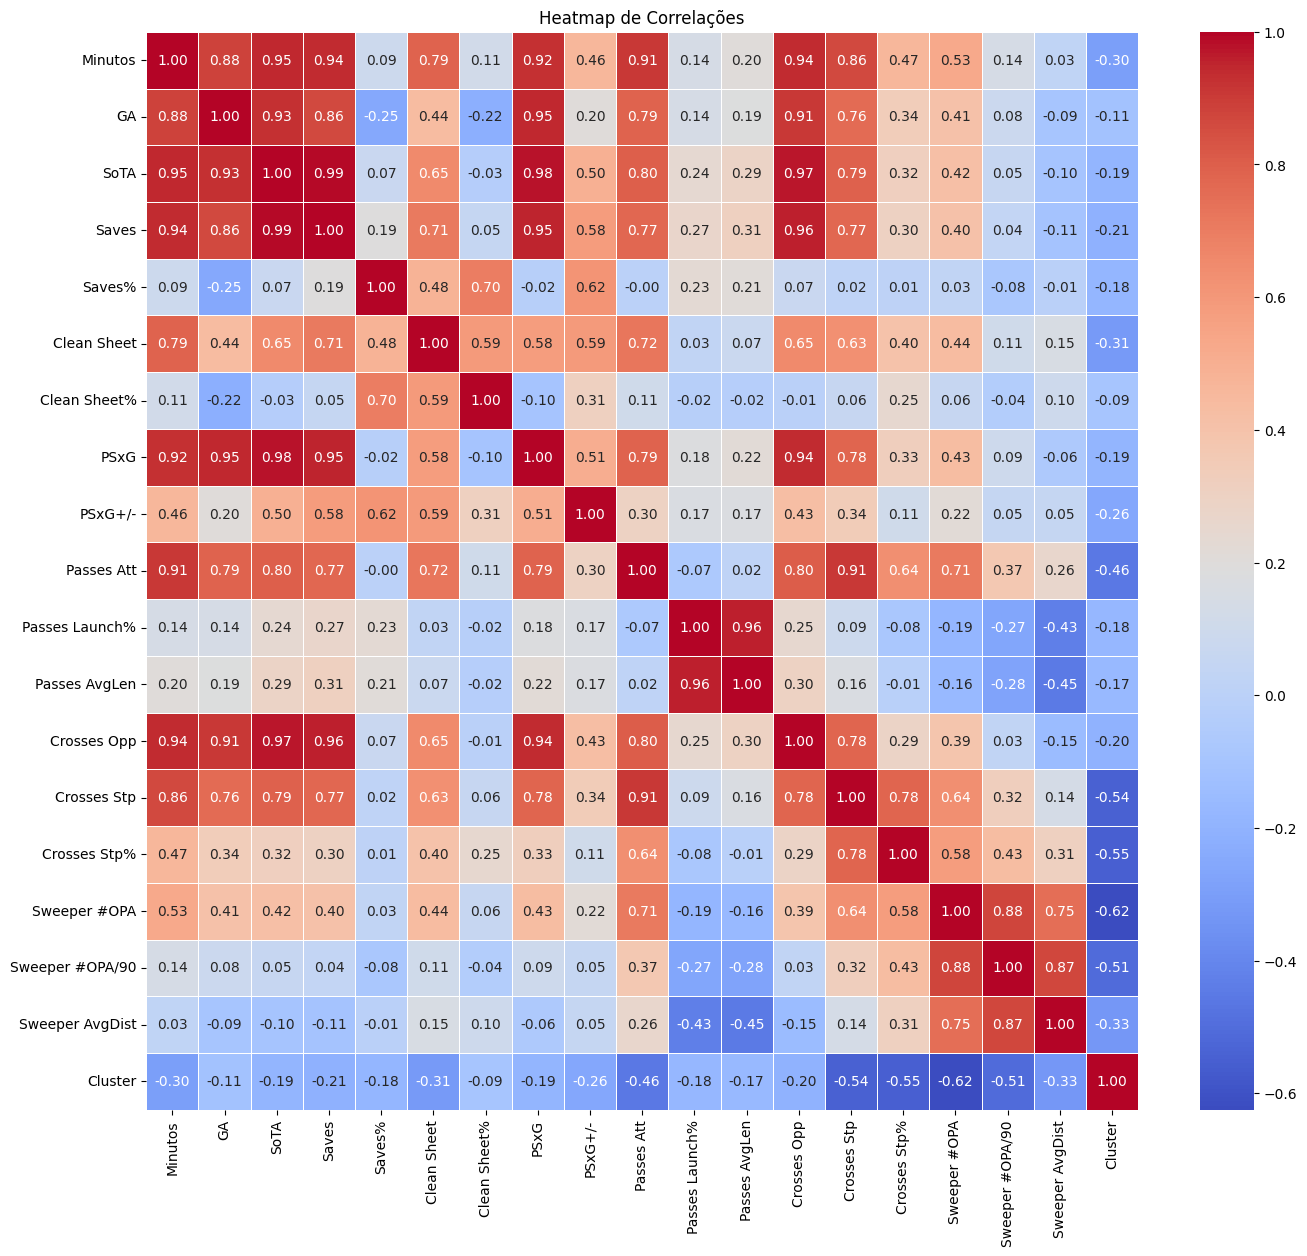

In [27]:
plt.figure(figsize=(16, 14))  # Define o tamanho da figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap de Correlações')
plt.show()

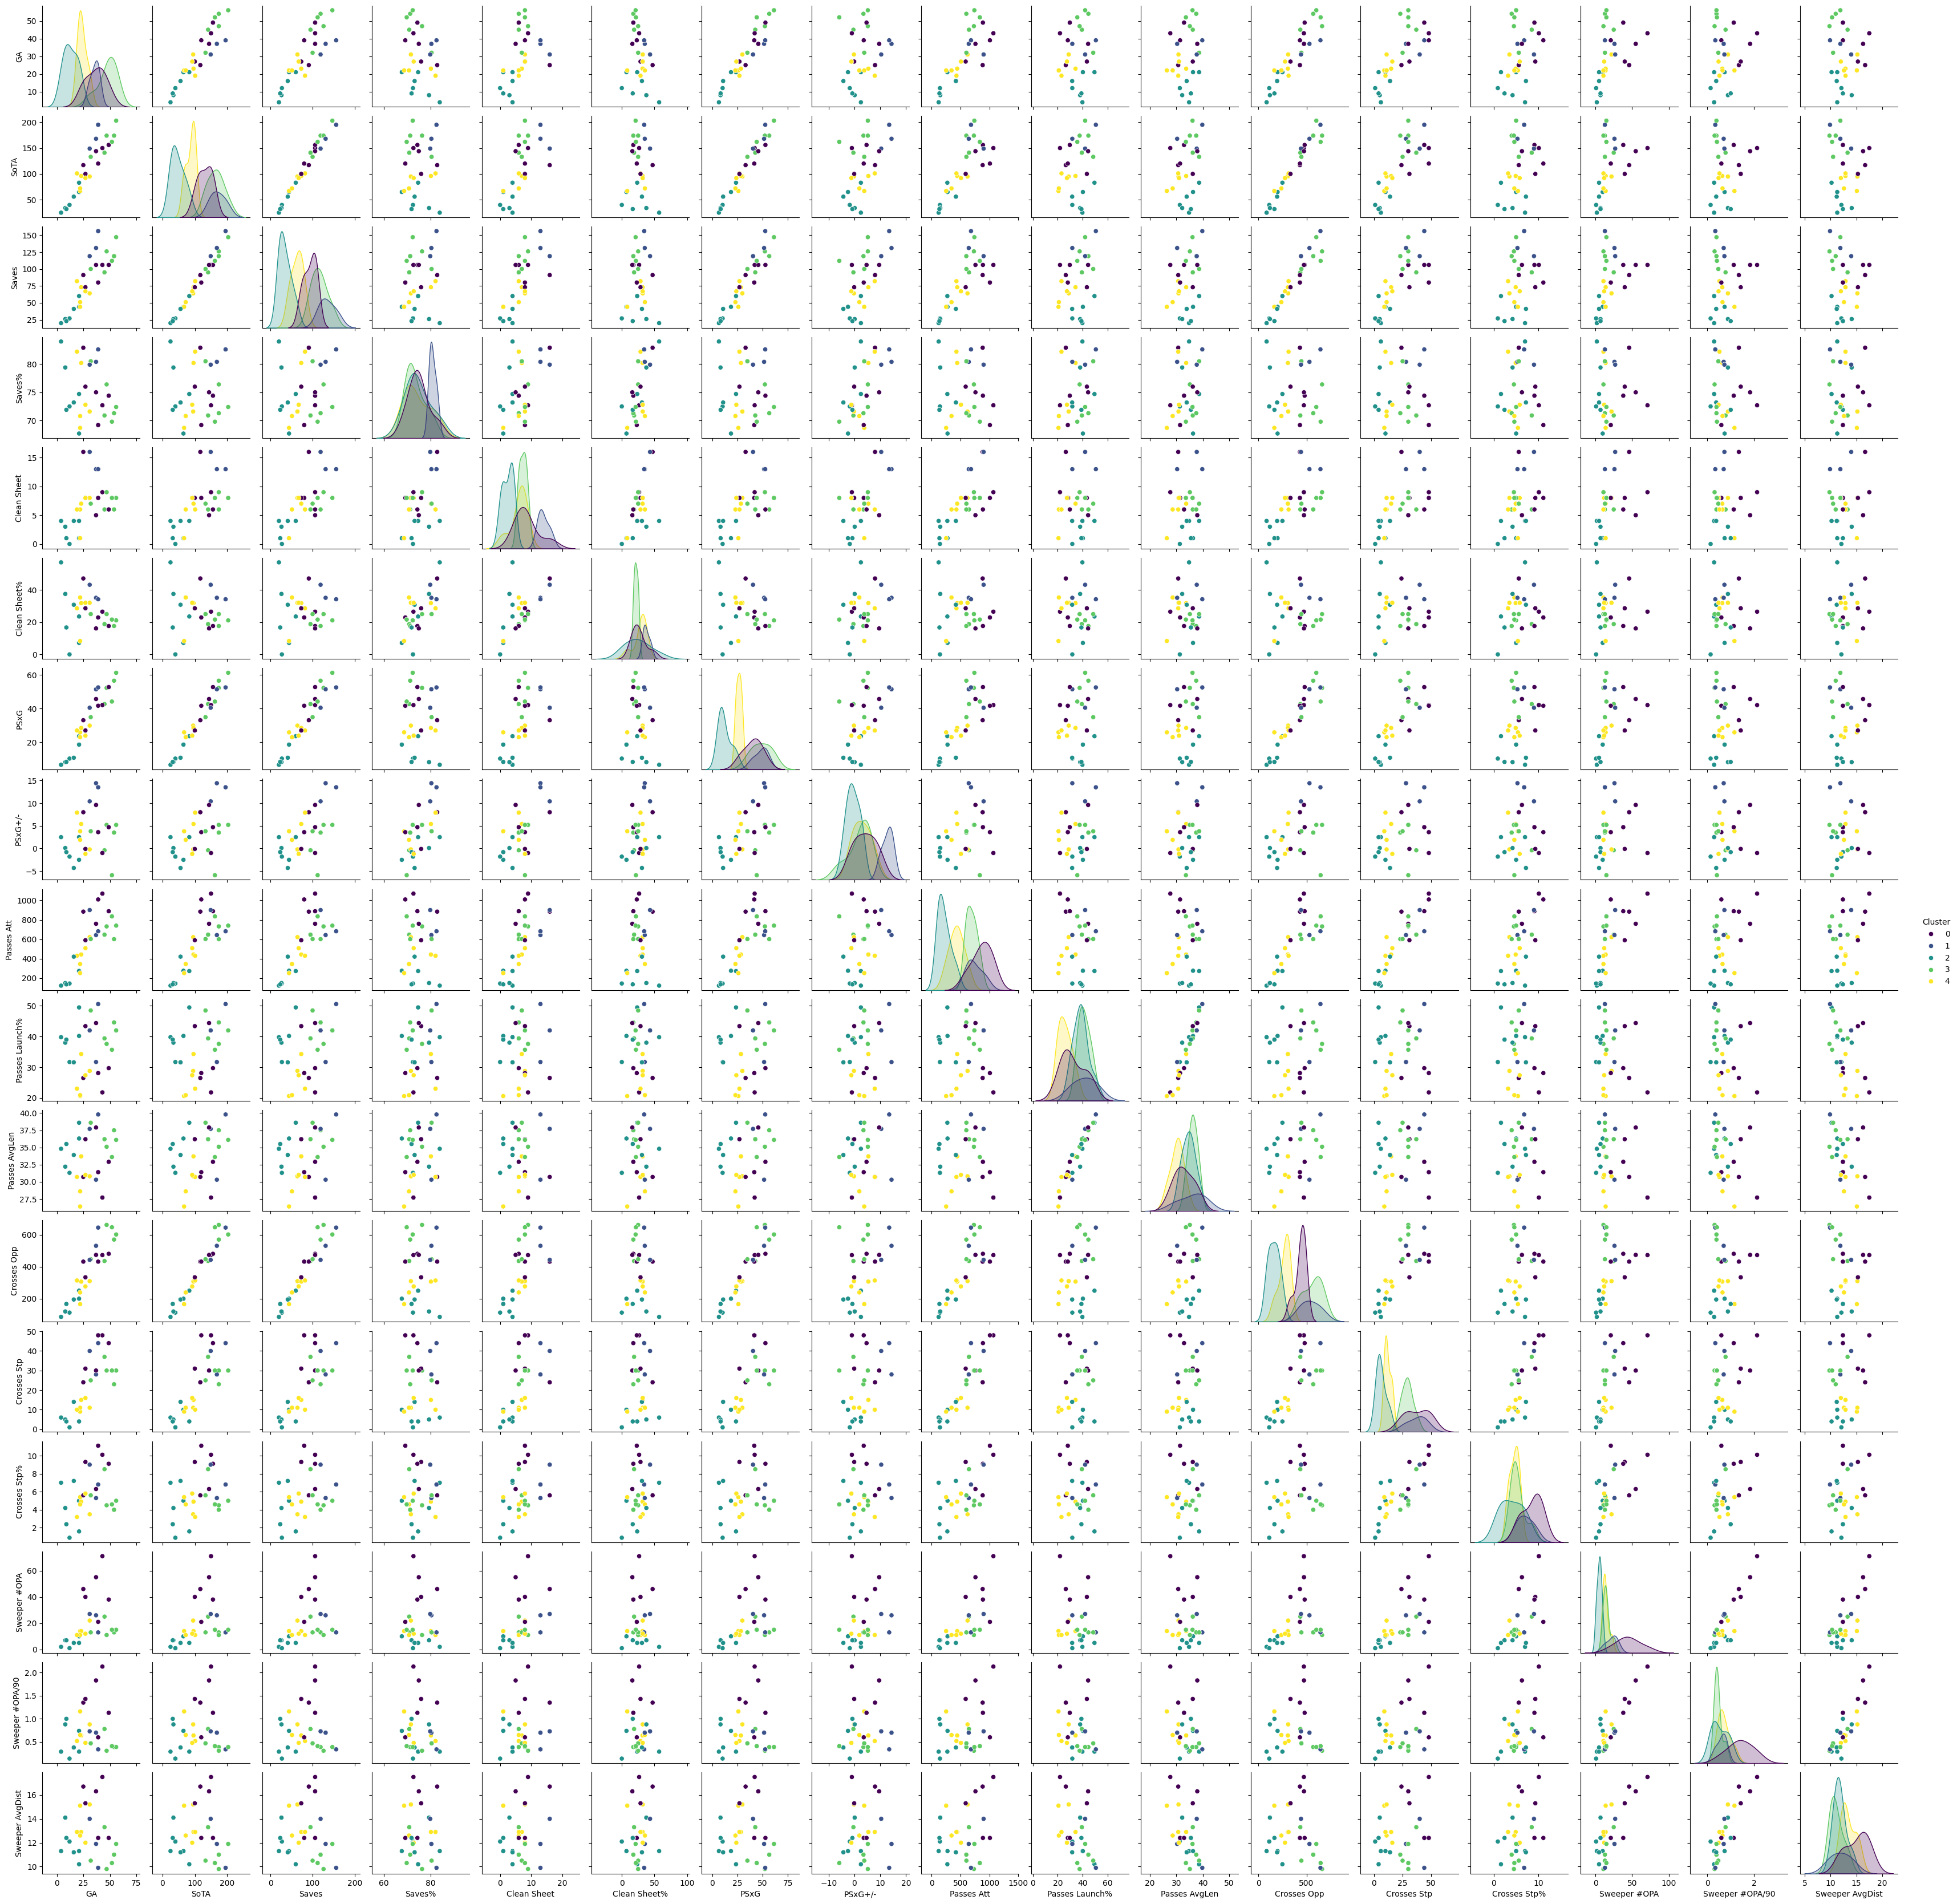

In [28]:
# Adicionar as métricas e o cluster ao DataFrame para visualização
metrics = ['GA', 'SoTA', 'Saves', 'Saves%', 'Clean Sheet','Clean Sheet%','PSxG', 'PSxG+/-', 'Passes Att', 'Passes Launch%', 'Passes AvgLen','Crosses Opp','Crosses Stp','Crosses Stp%','Sweeper #OPA','Sweeper #OPA/90','Sweeper AvgDist','Cluster']

# Plotar o pair plot para todas as métricas
sns.pairplot(Gol[metrics], hue='Cluster', palette='viridis', diag_kind='kde', height=2)
plt.show()


### **Comportamento de Variáveis e Distribuição de Clusters para Goleiros**

---

### **1. Análise de Correlações com Insights**

#### **Correlação Positiva Alta**
1. **Minutos vs GA (0.88):**
   Goleiros com mais minutos em campo tendem a sofrer mais gols devido à maior exposição, refletindo a alta correlação entre essas variáveis.

2. **SoTA (Defesas Totais) vs Saves (0.98):**
   Goleiros que realizam mais defesas totais também têm alto número de defesas efetivas, demonstrando sua importância na proteção do gol.

3. **Clean Sheets vs Clean Sheet % (0.78):**
   O número absoluto de jogos sem sofrer gols está alinhado com a porcentagem de clean sheets, mostrando consistência defensiva.

4. **Crosses Opp vs Crosses Stp (0.96):**
   Goleiros que enfrentam mais cruzamentos interceptam a maioria deles, indicando eficácia em situações de bola aérea.

5. **PSxG vs PSxG+/- (0.95):**
   Alta correlação entre gols esperados prevenidos e o saldo PSxG+/- destaca goleiros que vão além das expectativas defensivas.

---

#### **Correlação Moderada Positiva**
1. **Passes AvgLen vs Passes Launch% (0.96):**
   Goleiros que priorizam lançamentos longos demonstram um estilo consistente de distribuição, focado em passes de maior alcance.

2. **Sweeper OPA vs Sweeper #OPA/90 (0.87):**
   Goleiros que realizam mais ações fora da área mantêm essa abordagem ao longo dos 90 minutos, reforçando um estilo de jogo líbero.

3. **Clean Sheet % vs Saves% (0.65):**
   Goleiros com alta porcentagem de clean sheets também apresentam boas taxas de defesas realizadas, destacando eficiência geral.

4. **Crosses Opp vs Crosses Stp% (0.75):**
   Um número maior de cruzamentos enfrentados está ligado a uma alta taxa de cruzamentos interceptados, mostrando habilidade técnica.

---

#### **Correlação Negativa Moderada**
1. **Cluster vs Clean Sheet % (-0.31):**
   A atribuição dos clusters impacta negativamente a porcentagem de clean sheets, sugerindo diferenças no estilo ou contexto defensivo.

2. **GA vs Saves% (-0.25):**
   Goleiros que sofrem mais gols tendem a ter uma menor porcentagem de defesas realizadas, refletindo baixa eficiência defensiva.

3. **Passes Launch% vs Sweeper AvgDist (-0.43):**
   Estratégias de distribuição longa podem reduzir a necessidade de goleiros atuarem como líberos fora da área.

---

---

### **2. Perfis dos Clusters com Médias**

#### **Cluster 0 (Especialistas em Cruzamentos)**
- **Perfil:**
  - **Minutos:** 2906.5
  - **Cruzamentos Enfrentados:** 437.6
  - **Cruzamentos Interceptados:** 37.5 (8.5%)
  - Alta média de ações fora da área (Sweeper #OPA: 45.2).
- **Estilo de Jogo:** Domínio em bolas aéreas e boa leitura de jogo.
- **Função Principal:** Neutralizar cruzamentos e proteger a área defensiva.

---

#### **Cluster 1 (Defensores Consistentes)**
- **Perfil:**
  - **Minutos:** 3360.0
  - **Clean Sheets:** 14.0 (37.5%)
  - Alta média de saves% (80.97%).
- **Estilo de Jogo:** Goleiros sólidos e confiáveis em evitar gols.
- **Função Principal:** Manter a consistência defensiva com boas defesas.

---

#### **Cluster 2 (Líberos Proativos)**
- **Perfil:**
  - **Minutos:** 938.4
  - **Sweeper #OPA/90:** 0.53
  - Alta média em Sweeper Actions (Sweeper OPA: 5.3).
- **Estilo de Jogo:** Goleiros líberos que atuam fora da área.
- **Função Principal:** Avançar para cortar jogadas em situações de alta pressão.

---

#### **Cluster 3 (Finalizadores de Defesa)**
- **Perfil:**
  - **Minutos:** 3056.8
  - **PSxG:** 48.6
  - **PSxG+/-:** 1.9
  - Alta média de saves (73.55%).
- **Estilo de Jogo:** Foco em defesas difíceis e prevenção de gols esperados.
- **Função Principal:** Ser a última linha de defesa em situações críticas.

---

#### **Cluster 4 (Distribuidores Estratégicos)**
- **Perfil:**
  - **Minutos:** 1829.8
  - **Passes Longos (%):** 25.8
  - Comprimento médio dos passes: 30.2m.
- **Estilo de Jogo:** Goleiros que iniciam contra-ataques rápidos com passes longos.
- **Função Principal:** Contribuir para a construção ofensiva com distribuição eficiente.

---

### **3. Destaques em Comportamento**

1. **Crosses Opp vs Crosses Stp (0.96):**
   Forte correlação entre cruzamentos enfrentados e interceptados indica habilidade técnica em jogadas aéreas.

2. **PSxG vs Saves (0.86):**
   Goleiros que realizam mais defesas têm maior expectativa de prevenir gols, mostrando reflexos rápidos.

3. **Passes AvgLen vs Passes Launch% (0.96):**
   Goleiros com estilo de distribuição longa demonstram consistência estratégica.

4. **Sweeper OPA vs Sweeper #OPA/90 (0.87):**
   Consistência em ações fora da área reforça um estilo de jogo líbero.




In [29]:
cluster_names = {
    0: 'goleiros cross',
    1: 'goleiros consistentes',
    2: 'goleiros liberos',
    3: 'goleiros solidos',
    4: 'goleiros reservas'
}

# Adicionar nomes ao DataFrame
Gol['Perfil'] = Gol['Cluster'].map(cluster_names)

# Exibir os primeiros jogadores com seus perfis
print(Gol[['jogador', 'time', 'posicao', 'Minutos', 'GA', 'SoTA', 'Saves', 'Saves%', 'Clean Sheet','Clean Sheet%','PSxG', 'PSxG+/-', 'Passes Att', 'Passes Launch%', 'Passes AvgLen','Crosses Opp','Crosses Stp','Crosses Stp%','Sweeper #OPA','Sweeper #OPA/90','Sweeper AvgDist','Perfil']].head())

          jogador              time posicao  Minutos  GA  SoTA  Saves  Saves%  \
0           Bento    Ath Paranaense      GK      630   4    25     20    84.0   
1  Leonardo Linck    Ath Paranaense      GK     1223  21    65     44    67.7   
2          Mycael    Ath Paranaense      GK     1565  21    83     60    74.7   
4         Ronaldo    Atl Goianiense      GK     2879  45   141     95    70.9   
6  Matheus Mendes  Atlético Mineiro      GK     1087  22    67     44    68.7   

   Clean Sheet  Clean Sheet%  ...  Passes Att  Passes Launch%  Passes AvgLen  \
0            4          57.1  ...         123            39.8           34.8   
1            1           7.1  ...         276            40.2           36.3   
2            4          23.5  ...         273            49.5           38.6   
4            6          18.8  ...         647            39.4           36.2   
6            1           8.3  ...         252            20.6           26.4   

   Crosses Opp  Crosses Stp  Cro

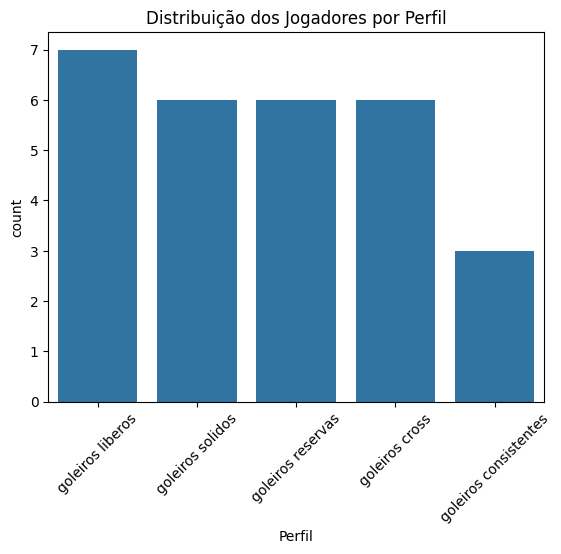

In [30]:
sns.countplot(data=Gol, x='Perfil')
plt.xticks(rotation=45)
plt.title('Distribuição dos Jogadores por Perfil')
plt.show()


In [31]:
# Função para exibir jogadores de um perfil específico
def exibir_jogadores_por_perfil(perfil_escolhido):
    # Filtrar os jogadores pelo perfil escolhido
    jogadores_filtrados = Gol[Gol['Perfil'] == perfil_escolhido]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado para o perfil: {perfil_escolhido}")
    else:
        print(f"\nJogadores no perfil: {perfil_escolhido}")
        print(jogadores_filtrados[['jogador', 'time', 'posicao', 'Minutos', 'GA', 'SoTA', 'Saves', 'Saves%', 'Clean Sheet','Clean Sheet%','PSxG', 'PSxG+/-', 'Passes Att', 'Passes Launch%', 'Passes AvgLen','Crosses Opp','Crosses Stp','Crosses Stp%','Sweeper #OPA','Sweeper #OPA/90','Sweeper AvgDist',]])

# Exemplo: Exibir jogadores do perfil "Apoiadores Ofensivos"
# Definir a largura máxima e o número de colunas exibidas
pd.set_option('display.max_columns', None)  # Exibir todas as colunas
pd.set_option('display.width', 1000)        # Aumentar a largura da tabela
perfil_escolhido = "goleiros solidos"  # Altere conforme necessário
exibir_jogadores_por_perfil(perfil_escolhido)



Jogadores no perfil: goleiros solidos
              jogador            time posicao  Minutos  GA  SoTA  Saves  Saves%  Clean Sheet  Clean Sheet%  PSxG  PSxG+/-  Passes Att  Passes Launch%  Passes AvgLen  Crosses Opp  Crosses Stp  Crosses Stp%  Sweeper #OPA  Sweeper #OPA/90  Sweeper AvgDist
4             Ronaldo  Atl Goianiense      GK     2879  45   141     95    70.9            6          18.8  42.6     -0.4         647            39.4           36.2          436           37           8.5            25             0.78             13.3
18            Gustavo        Criciúma      GK     2997  54   174    119    71.3            6          17.6  56.5      3.5         601            44.6           37.5          570           23           4.0            13             0.39             11.0
22             Walter          Cuiabá      GK     3240  47   174    126    76.4            9          25.0  52.2      5.2         732            37.6           35.1          662           30           4

In [32]:
# Dicionário dos peso para cada métrica
pesos = {
    'GA': -5,
    'Saves': 2,
    'Clean Sheet': 10,
    'PSxG': 5,
    'Passes Launch%': 3,
    'Crosses Stp%': 5,
    'Sweeper #OPA' : 5,
}

# Função para normalizar uma métrica com base no valor máximo
def normalizar(coluna):
    return coluna / coluna.max()

# Calculando as pontuações individuais para cada métrica
for coluna, peso in pesos.items():
    Gol[coluna + '_Pontuacao'] = Gol[coluna] * peso

# Calculando a pontuação total
colunas_pontuacao = [coluna + '_Pontuacao' for coluna in pesos.keys()]
Gol['Pontuacao_Total'] = Gol[colunas_pontuacao].sum(axis=1)

# **Normalizando a pontuação total para o intervalo [0, 100]**
min_pontuacao = Gol['Pontuacao_Total'].min()
max_pontuacao = Gol['Pontuacao_Total'].max()
Gol['Pontuacao'] = (
    (Gol['Pontuacao_Total'] - min_pontuacao) / (max_pontuacao - min_pontuacao)
) * 100

# Filtrando os jogadores por perfil desejado e ordenando pelo total normalizado
perfil_escolhido = 'goleiros consistentes'
jogadores_filtrados = Gol[Gol['Perfil'] == perfil_escolhido]
jogadores_ordenados = jogadores_filtrados.sort_values(by='Pontuacao', ascending=False)

# Adicionando uma coluna de ranking
jogadores_ordenados['Ranking'] = range(1, len(jogadores_ordenados) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = jogadores_ordenados[['Ranking','time','posicao', 'jogador', 'Perfil', 'Pontuacao']]

# Imprimindo o resultado final no console
print("\nRanking de jogadores no perfil:", perfil_escolhido)
print(resultado_final.to_string(index=False))


Ranking de jogadores no perfil: goleiros consistentes
 Ranking       time posicao            jogador                Perfil  Pontuacao
       1  Fortaleza      GK João Ricardo Riedi goleiros consistentes  98.770823
       2  Palmeiras      GK           Wéverton goleiros consistentes  97.266699
       3 Fluminense      GK              Fábio goleiros consistentes  91.541323


In [33]:
4# Filtrando os jogadores pelo perfil escolhido
perfil_escolhido = 'goleiros solidos'  # Defina o perfil desejado
jogadores_filtrados = Gol[Gol['Perfil'] == perfil_escolhido].copy()

# Lista com os nomes dos jogadores disponíveis
jogadores_disponiveis = jogadores_filtrados['jogador'].tolist()

# Dicionário para armazenar os valores de mercado inseridos
valores_mercado = {}

# Loop para inserir manualmente os jogadores e seus valores
print(f"Jogadores disponíveis no perfil '{perfil_escolhido}': {jogadores_disponiveis}")

while jogadores_disponiveis:
    # Input para selecionar o jogador
    jogador_escolhido = input("Digite o nome do jogador (ou 'sair' para finalizar): ")

    # Verifica se o nome inserido é válido ou finaliza o processo
    if jogador_escolhido.lower() == 'sair':
        break
    elif jogador_escolhido not in jogadores_disponiveis:
        print("Jogador não encontrado. Tente novamente.")
        continue

    # Input para inserir o valor de mercado
    while True:
        try:
            valor = float(input(f"Insira o valor de mercado para {jogador_escolhido} (€M): "))
            valores_mercado[jogador_escolhido] = valor  # Armazena o valor inserido
            jogadores_disponiveis.remove(jogador_escolhido)  # Remove da lista de disponíveis
            break
        except ValueError:
            print("Valor inválido. Por favor, insira um número válido.")

# Adicionando os valores de mercado ao DataFrame
jogadores_filtrados['Valor de Mercado (€M)'] = jogadores_filtrados['jogador'].map(valores_mercado)

# Calculando o custo por ponto
jogadores_filtrados['Custo por Ponto (€M)'] = (
    jogadores_filtrados['Valor de Mercado (€M)'] / jogadores_filtrados['Pontuacao']
)

# Calculando o Score de valor
jogadores_filtrados['Score de Valor'] = (
    jogadores_filtrados['Pontuacao'] / jogadores_filtrados['Valor de Mercado (€M)']
)

# Ordenando pelo maior Score de valor
resultado_final = jogadores_filtrados.sort_values(by='Score de Valor', ascending=False)

# Adicionando a coluna de ranking
resultado_final['Ranking'] = range(1, len(resultado_final) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = resultado_final[
    ['Ranking', 'jogador', 'Valor de Mercado (€M)', 'Pontuacao', 'Custo por Ponto (€M)', 'Score de Valor']
]

# Exibindo o resultado final
print("\nRanking de jogadores por eficiência de valor:")
print(resultado_final.to_string(index=False))


Jogadores disponíveis no perfil 'goleiros solidos': ['Ronaldo', 'Gustavo', 'Walter', 'Agustín Marchesín', 'Léo Jardim', 'Lucas Arcanjo']
Digite o nome do jogador (ou 'sair' para finalizar): Lucas Arcanjo
Insira o valor de mercado para Lucas Arcanjo (€M): 1
Digite o nome do jogador (ou 'sair' para finalizar): Walter
Insira o valor de mercado para Walter (€M): 0.5
Digite o nome do jogador (ou 'sair' para finalizar): Agustín Marchesín
Insira o valor de mercado para Agustín Marchesín (€M): 4
Digite o nome do jogador (ou 'sair' para finalizar): Léo Jardim
Insira o valor de mercado para Léo Jardim (€M): 3
Digite o nome do jogador (ou 'sair' para finalizar): sair

Ranking de jogadores por eficiência de valor:
 Ranking           jogador  Valor de Mercado (€M)  Pontuacao  Custo por Ponto (€M)  Score de Valor
       1            Walter                    0.5  66.100598              0.007564      132.201197
       2     Lucas Arcanjo                    1.0  51.754812              0.019322       5


Jogadores selecionados: Marcos Felipe, João Ricardo Riedi, Gabriel, Cleiton Schwengber
    Minutos  GA  SoTA  Saves  Saves%  Clean Sheet  Clean Sheet%  PSxG  PSxG+/-  Passes Att  Passes Launch%  Passes AvgLen  Crosses Opp  Crosses Stp  Crosses Stp%  Sweeper #OPA  Sweeper #OPA/90  Sweeper AvgDist
10     2996  43   150    106    72.7            9          26.5  42.0     -1.0        1069            21.8           27.7          473           48          10.1            71             2.13             17.5
27     3420  39   195    156    82.6           13          34.2  52.5     13.5         682            50.6           39.8          645           44           6.8            13             0.34              9.9
34     3014  49   156    106    74.4            6          17.6  52.7      4.7         888            29.7           32.9          481           44           9.1            38             1.13             12.4
38     2699  37   144    106    75.0            5          16.1  45.6   

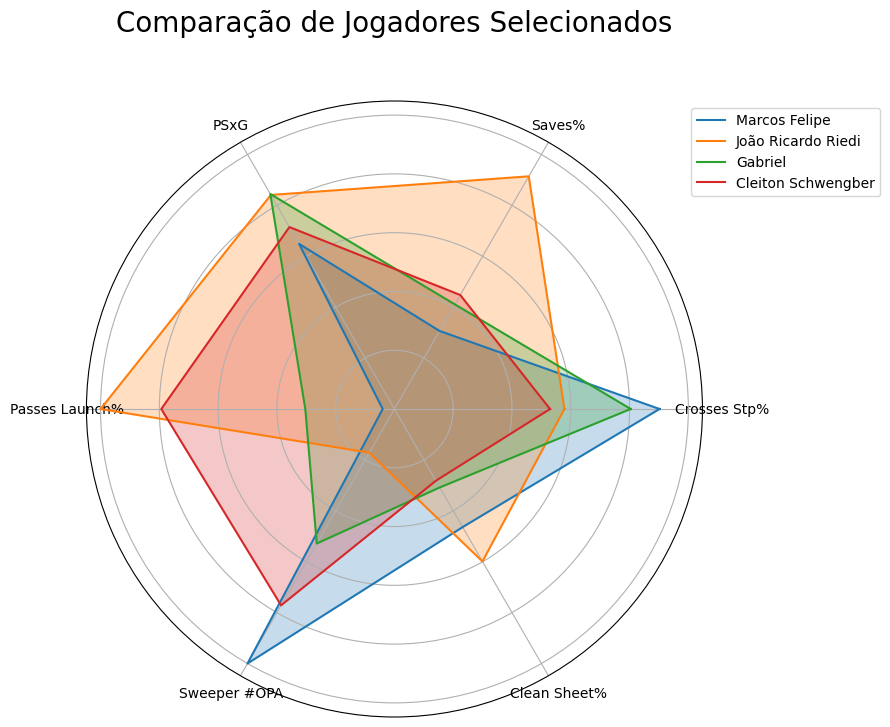

In [34]:
def radar_chart_por_jogadores(jogadores_selecionados, df):
    # Filtrar os jogadores pelos nomes inseridos
    jogadores_filtrados = df[df['jogador'].isin(jogadores_selecionados)]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado nos nomes fornecidos: {jogadores_selecionados}")
        return

    print(f"\nJogadores selecionados: {', '.join(jogadores_filtrados['jogador'])}")
    print(jogadores_filtrados[['Minutos', 'GA', 'SoTA', 'Saves', 'Saves%', 'Clean Sheet','Clean Sheet%','PSxG', 'PSxG+/-', 'Passes Att', 'Passes Launch%', 'Passes AvgLen','Crosses Opp','Crosses Stp','Crosses Stp%','Sweeper #OPA','Sweeper #OPA/90','Sweeper AvgDist',]])

    # Definir as métricas a serem exibidas no radar
    metricas = ['Crosses Stp%', 'Saves%', 'PSxG', 'Passes Launch%','Sweeper #OPA','Clean Sheet%',]
    num_vars = len(metricas)

    # Normalizar as métricas para todas ficarem na escala [0, 1]
    jogadores_normalizados = jogadores_filtrados.copy()
    for metrica in metricas:
        min_val = df[metrica].min()
        max_val = df[metrica].max()
        jogadores_normalizados[metrica] = (jogadores_filtrados[metrica] - min_val) / (max_val - min_val)

    # Ângulos para o gráfico radar
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Fechar o círculo

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Loop pelos jogadores selecionados
    for i, row in jogadores_normalizados.iterrows():
        valores = row[metricas].tolist()
        valores += valores[:1]  # Fechar o círculo

        # Plotar a linha e o preenchimento para o jogador
        ax.plot(angles, valores, label=row['jogador'])
        ax.fill(angles, valores, alpha=0.25)

    # Configurações do gráfico
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metricas)

    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.title('Comparação de Jogadores Selecionados', size=20, color='black', y=1.1)
    plt.show()

# Exemplo de uso: Insira os nomes dos jogadores que deseja comparar
jogadores_selecionados = ['Gabriel', 'Marcos Felipe','Cleiton Schwengber','João Ricardo Riedi']  # Altere conforme necessário
radar_chart_por_jogadores(jogadores_selecionados, Gol)